I'm sick of paying rent, so I modeled the depreciation on an RV to see if I could save money by moving into one.

First I found an RV I liked online, the "Keystone Montana."  Then I went to a RV trading website and wrote the prices for the first couple models I saw in a .txt file aith Atom.

In [1]:
import pandas as pd
D = pd.read_csv("keystone_montana.csv", index_col=False)
print(D.head())

   Price  Year
0  54900  2016
1  35900  2013
2  17000  2008
3  30000  2010
4  29500  2009


Then I drew a regression line

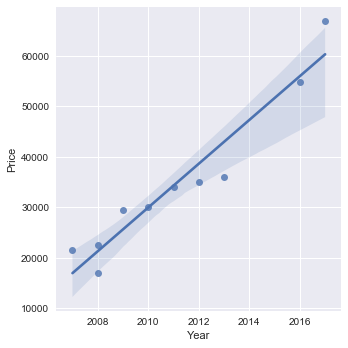

In [2]:
colnames = D.columns.values.tolist()
Y = D[colnames[0]]
X = D[colnames[1:]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x=colnames[1], y=colnames[0], data=D, fit_reg=True, truncate=True)
plt.show()

Looks like depreciation for the Keystone Montana is ~4,600/year, or $380/month.  If you're reading this because I'm asking you for a job, there's some ML stuff below.  It's really unnecessary for what I wanted to figure out this time, so I'm not going to explain it here.  Knowing when to use it is why they pay me the big bucks.

/Users/douglasmckinley/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/douglasmckinley/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


R^2=0.923
intercept and coeff: -8688828.646329837 [ 4337.70257388]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     95.67
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           1.00e-05
Time:                        00:00:27   Log-Likelihood:                -97.285
No. Observations:                  10   AIC:                             198.6
Df Residuals:                       8   BIC:                             199.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

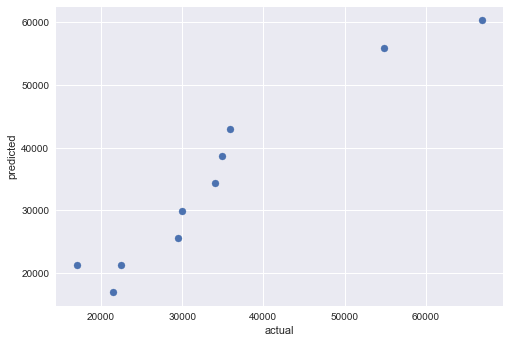

In [3]:
from sklearn import linear_model
import statsmodels.api as sm

# /// Approach #1: Just do a linear regression and output the R^2 score, as well as the coefficients
regr = linear_model.LinearRegression(fit_intercept=True).fit(X, Y)
print("R^2=%0.3f" % regr.score(X, Y))
print(f"intercept and coeff: {regr.intercept_} {regr.coef_}")

# /// Approach #2: Do the linear regression and compute P values and quality statistics
XwithIntercept = sm.add_constant(X)
model = sm.OLS(Y, XwithIntercept).fit()
print(model.summary())

# /// Plot the predicted values as a function of the actual values
plt.scatter(Y, regr.predict(X))
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()